In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_results = pd.read_csv("mlp_summary_results.csv")

## Top 10 models

In [3]:
df_sorted = df_results.sort_values(by='F1_macro',ascending = False)
df_sorted.head(10)

,F1_macro,activation_f,batch_size,dropout,hidden_size,lr,num_layers,opt,preprocessing,selected_features,type
1775,0.8047,sigmoid,256,0.2,1024,0.0001,4,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",MLP
2582,0.8040,sigmoid,256,0.5,1024,0.0001,4,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",MLP
1837,0.8034,sigmoid,256,0.0,1024,0.0001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",MLP
8727,0.8033,sigmoid,256,0.0,1024,0.0001,4,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",MLP
8060,0.8010,sigmoid,512,0.2,1024,0.0001,4,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",MLP
3778,0.8007,sigmoid,256,0.0,1024,0.0001,5,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",MLP
707,0.8005,sigmoid,256,0.5,1024,0.0001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",MLP
9195,0.8001,sigmoid,256,0.2,1024,0.0001,5,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",MLP
5714,0.7995,sigmoid,512,0.5,1024,0.0001,4,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",MLP
7629,0.7990,sigmoid,256,0.2,1024,0.0001,3,adam,log,"n_flows,n_packets,n_bytes,n_dest_asn,n_dest_po...",MLP


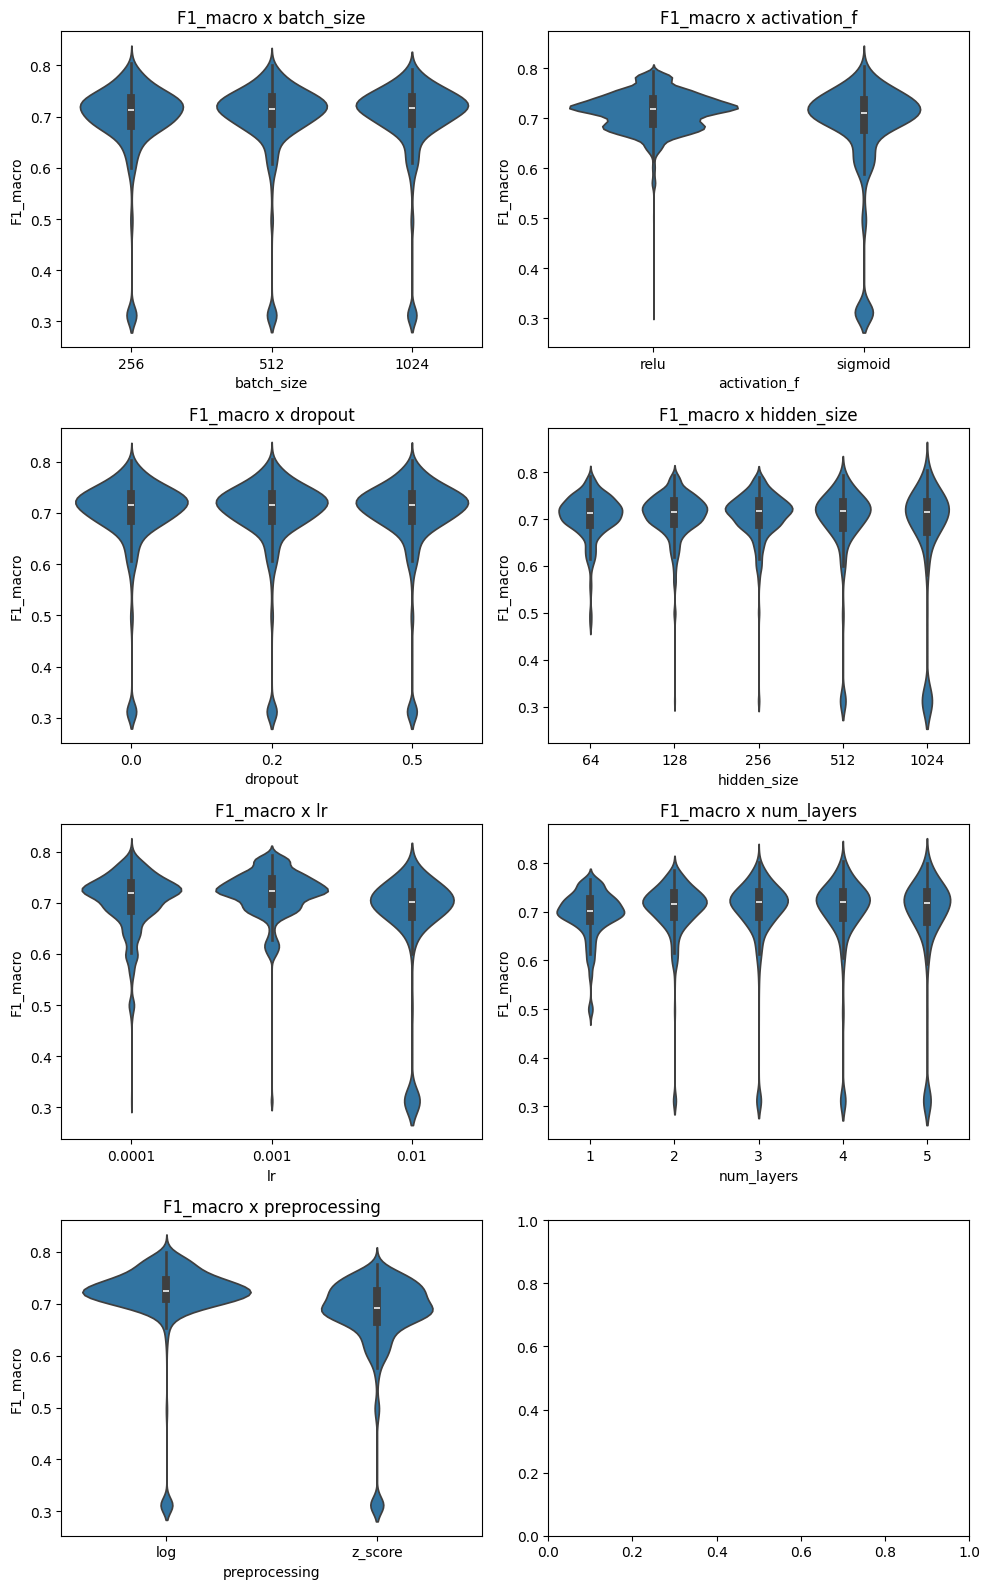

In [4]:
fig, axes = plt.subplots(4, 2, figsize=(5*2, 4*4))
axes = axes.flatten()

for idx, col in enumerate(['batch_size','activation_f','dropout', 'hidden_size', 'lr', 'num_layers','preprocessing']):
    sns.violinplot(data=df_results, x=col, y='F1_macro', ax=axes[idx])
    axes[idx].set_title(f'{'F1_macro'} x {col}')


plt.tight_layout()
plt.show()

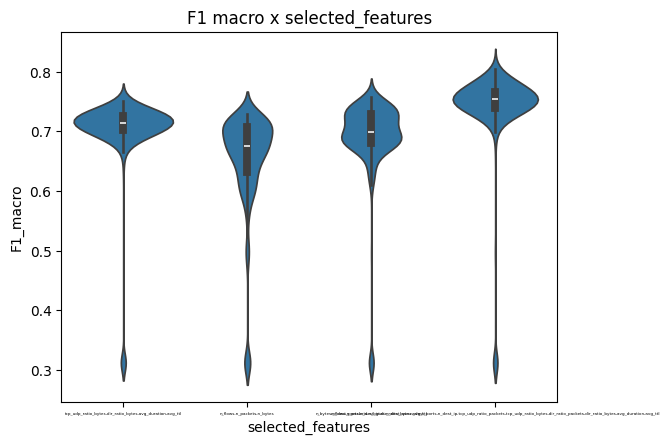

In [5]:
sns.violinplot(data=df_results, x='selected_features', y='F1_macro')
plt.title('F1 macro x selected_features')
plt.xticks(fontsize=3)
plt.show()

In [6]:
print(df_results.groupby('selected_features')['F1_macro'].max())

selected_features
n_bytes,n_dest_ports,n_dest_ip,dir_ratio_bytes,avg_ttl                                                                                                          0.7576
n_flows,n_packets,n_bytes                                                                                                                                       0.7298
n_flows,n_packets,n_bytes,n_dest_asn,n_dest_ports,n_dest_ip,tcp_udp_ratio_packets,tcp_udp_ratio_bytes,dir_ratio_packets,dir_ratio_bytes,avg_duration,avg_ttl    0.8047
tcp_udp_ratio_bytes,dir_ratio_bytes,avg_duration,avg_ttl                                                                                                        0.7503
Name: F1_macro, dtype: float64
